In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
plt.style.use('seaborn')

In [2]:
data = pd.read_csv('Resources/listings.csv')

In [3]:
#Create data frame with only columns I want to keep
MainDF=data[['host_id','room_type','neighbourhood_group','price', 'calculated_host_listings_count']]

In [20]:
#Create data frame for each Bororough-recreating from main code, but also adding >1 to make clearner plots
BrooklynDF=MainDF[MainDF["neighbourhood_group"]=="Brooklyn"]
BrooklynF=BrooklynDF[BrooklynDF['calculated_host_listings_count']>1]
BronxDF=MainDF[MainDF["neighbourhood_group"]=="Bronx"]
BronxF=BronxDF[BronxDF['calculated_host_listings_count']>1]
ManhattanDF=MainDF[MainDF["neighbourhood_group"]=="Manhattan"]
ManhattanF=ManhattanDF[ManhattanDF["price"]>1]
QueensDF=MainDF[MainDF["neighbourhood_group"]=="Queens"]
QueensF=QueensDF[QueensDF["price"]>1]
StatenIslandDF=MainDF[MainDF["neighbourhood_group"]=="Staten Island"]
StatenIslandF=StatenIslandDF[StatenIslandDF['calculated_host_listings_count']>1]
MainF=MainDF[MainDF['calculated_host_listings_count']>1]
Main=MainF[MainF['price']<4000]

In [5]:
#Recreating from main code to practice different graphs
PrivateBrooklyn = BrooklynF[BrooklynF["room_type"]=='Private room']
SharedBrooklyn=BrooklynF[BrooklynF["room_type"]=='Shared room']
HotelBrooklyn=BrooklynF[BrooklynF["room_type"]=='Hotel room']
HouseBrooklyn=BrooklynF[BrooklynF["room_type"]=='Entire home/apt']

The r-squared is: 0.0026614994694487853


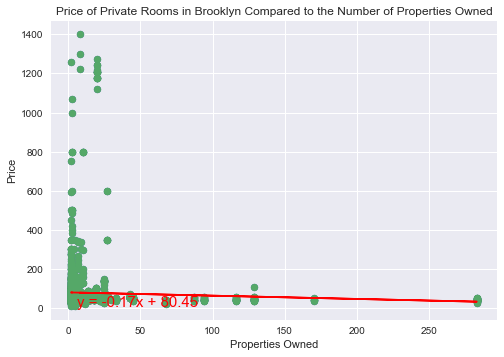

In [6]:
#Testing scatter with r/line
x_values = PrivateBrooklyn['calculated_host_listings_count']
y_values = PrivateBrooklyn['price']
plt.scatter(x_values,y_values)
plt.title('Price of Private Rooms in Brooklyn Compared to the Number of Properties Owned')
plt.xlabel('Properties Owned')
plt.ylabel('Price')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show()

<AxesSubplot:xlabel='calculated_host_listings_count', ylabel='price'>

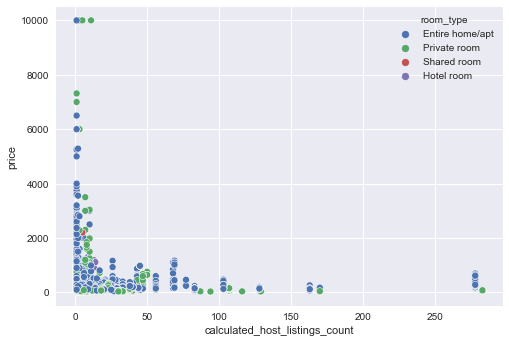

In [7]:
#testing scatterplots with seaborn and different info on one plot
sns.scatterplot(data=ManhattanF, x="calculated_host_listings_count", y="price", hue="room_type")

<AxesSubplot:xlabel='calculated_host_listings_count', ylabel='price'>

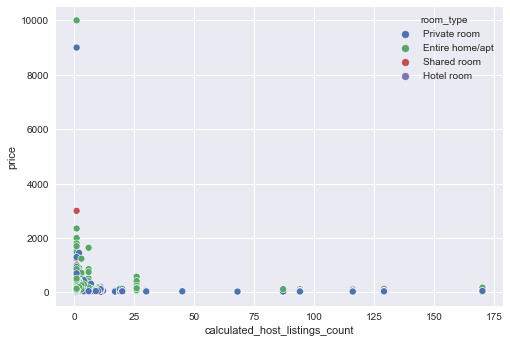

In [8]:
sns.scatterplot(data=QueensF, x="calculated_host_listings_count", y="price", hue="room_type")

<AxesSubplot:xlabel='calculated_host_listings_count', ylabel='price'>

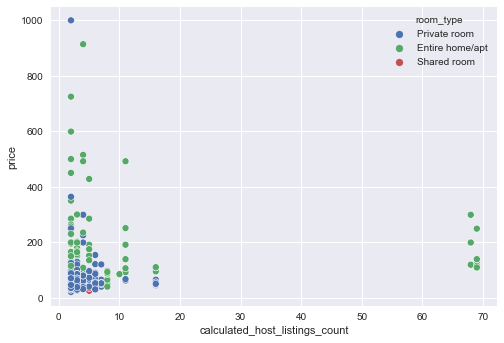

In [9]:
sns.scatterplot(data=BronxF, x="calculated_host_listings_count", y="price", hue="room_type")

<AxesSubplot:xlabel='calculated_host_listings_count', ylabel='price'>

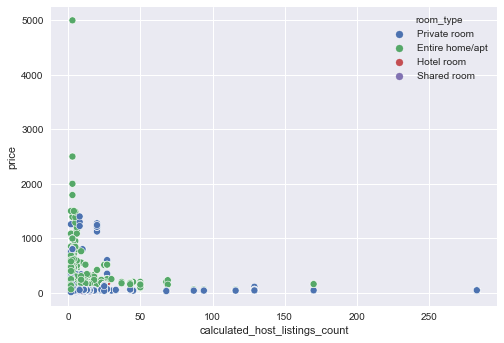

In [10]:
sns.scatterplot(data=BrooklynF, x="calculated_host_listings_count", y="price", hue="room_type")

<AxesSubplot:xlabel='calculated_host_listings_count', ylabel='price'>

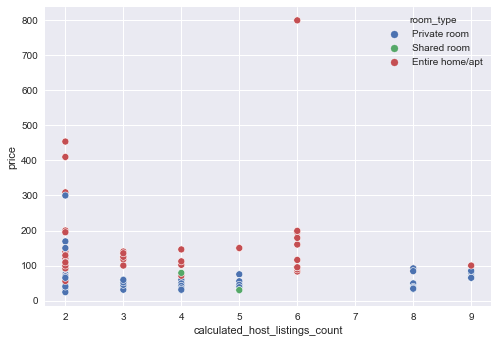

In [11]:
sns.scatterplot(data=StatenIslandF,x="calculated_host_listings_count", y="price", hue="room_type")

<AxesSubplot:xlabel='calculated_host_listings_count', ylabel='price'>

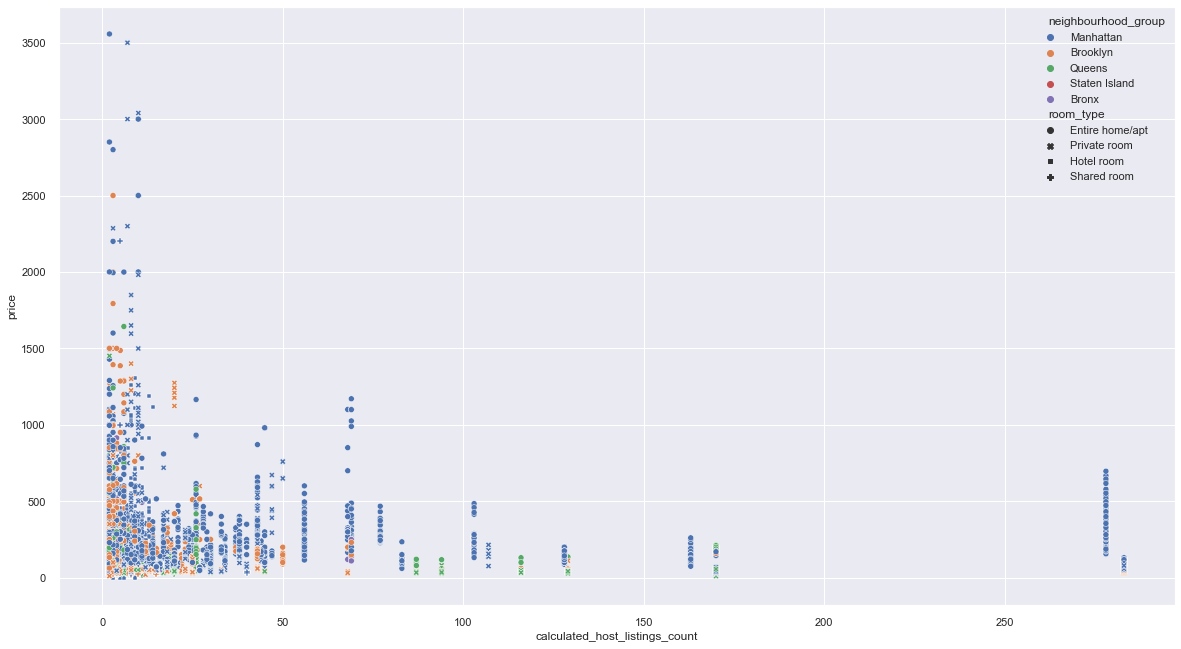

In [21]:
#Combining all boroughs and room types in one.  Made new DF just to cut off the highest prices for better readability.  Plots on other pynb show no relationship so this is just an attempt at an interesting visual
sns.set(rc={'figure.figsize':(20,11)})
sns.scatterplot(data=Main,x="calculated_host_listings_count", y="price", hue="neighbourhood_group", style='room_type')